In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import warnings

import pandas.testing as tm


In [ ]:
url = "https://raw.githubusercontent.com/Muffin1604/diamond_price_prediction/main/diamonds.csv"
data = pd.read_csv(url)
print(data)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [ ]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [ ]:
data.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
data.shape

(53940, 11)

In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data = data.drop(['depth','table','x','y','z'], axis = 1)

In [ ]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [ ]:
data.head(2)

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326


In [ ]:
print(data)

       carat        cut color clarity  price
0       0.23      Ideal     E     SI2    326
1       0.21    Premium     E     SI1    326
2       0.23       Good     E     VS1    327
3       0.29    Premium     I     VS2    334
4       0.31       Good     J     SI2    335
...      ...        ...   ...     ...    ...
53935   0.72      Ideal     D     SI1   2757
53936   0.72       Good     D     SI1   2757
53937   0.70  Very Good     D     SI1   2757
53938   0.86    Premium     H     SI2   2757
53939   0.75      Ideal     D     SI2   2757

[53940 rows x 5 columns]


In [ ]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
price        int64
dtype: object

In [ ]:
data['price']=data.price.astype(float)
data.dtypes

carat      float64
cut         object
color       object
clarity     object
price      float64
dtype: object

#Feature description:

##The 4 Cs of Diamonds



*  carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats. One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.
* cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.


*  color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds
*  clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.







#**DATA** **VISUALISATION**

Text(0.5, 1.0, 'cut')

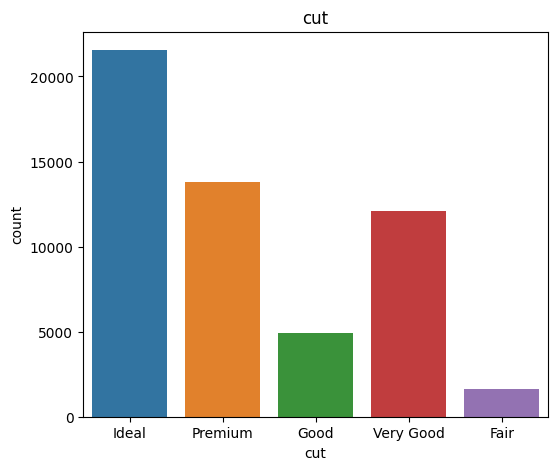

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='cut')
plt.title("cut")

Text(0.5, 1.0, 'color')

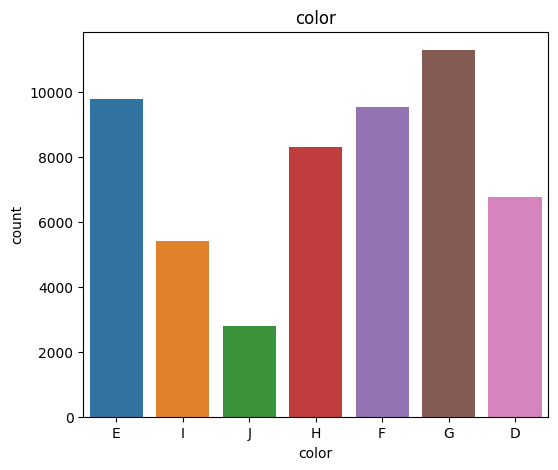

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='color')
plt.title("color")


Text(0.5, 1.0, 'Clarity')

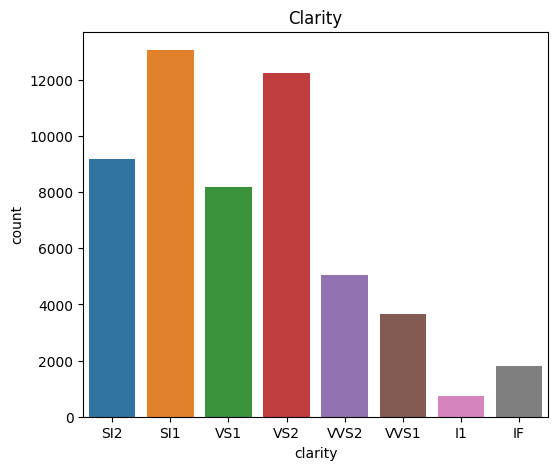

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='clarity')
plt.title("Clarity")

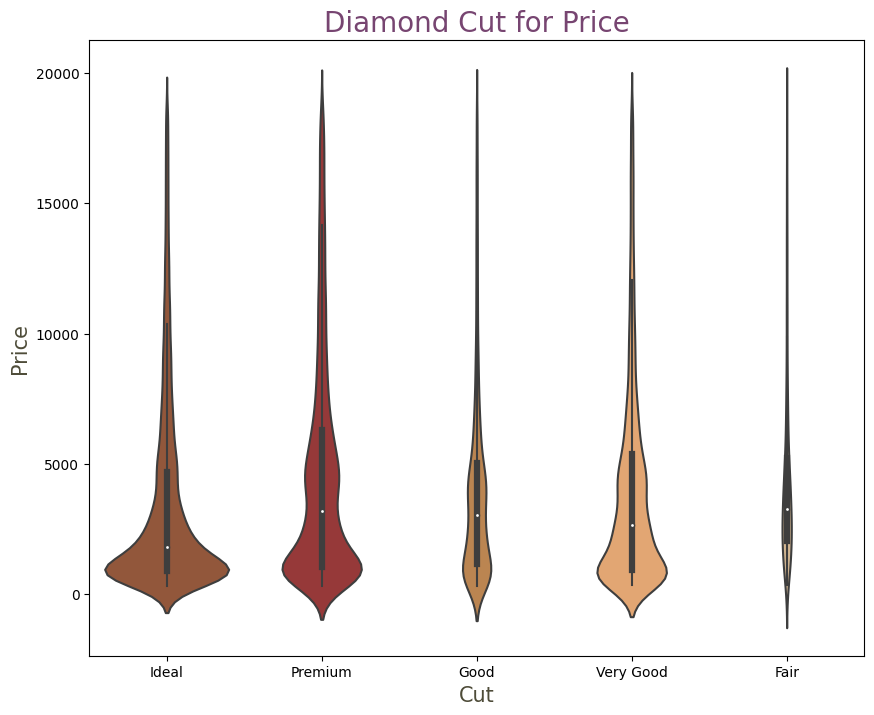

In [ ]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

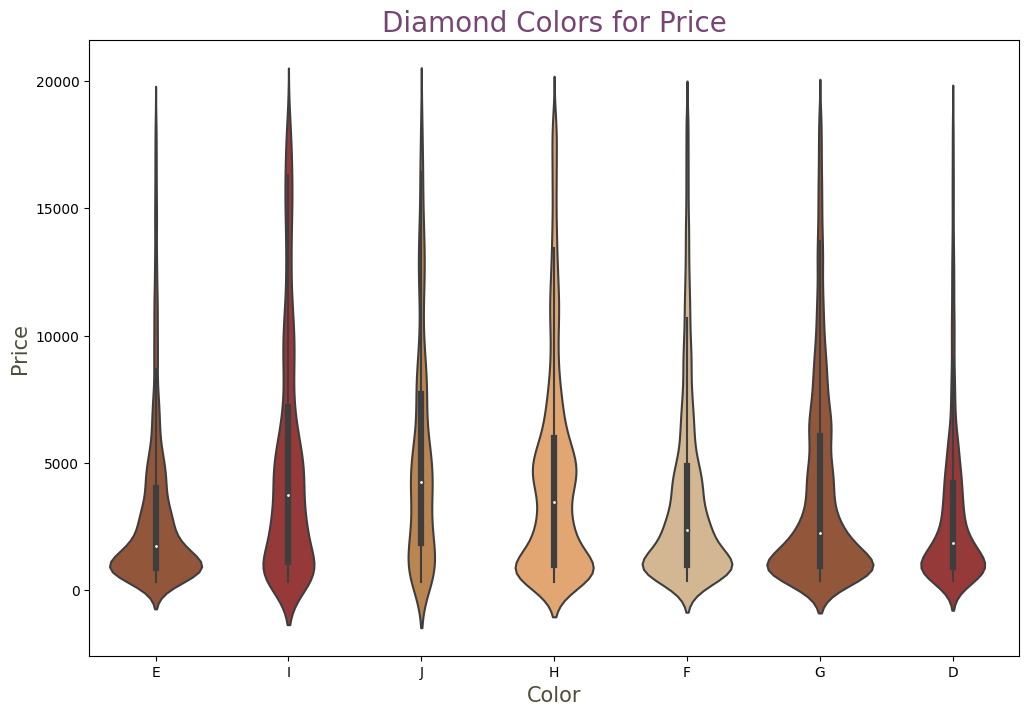

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

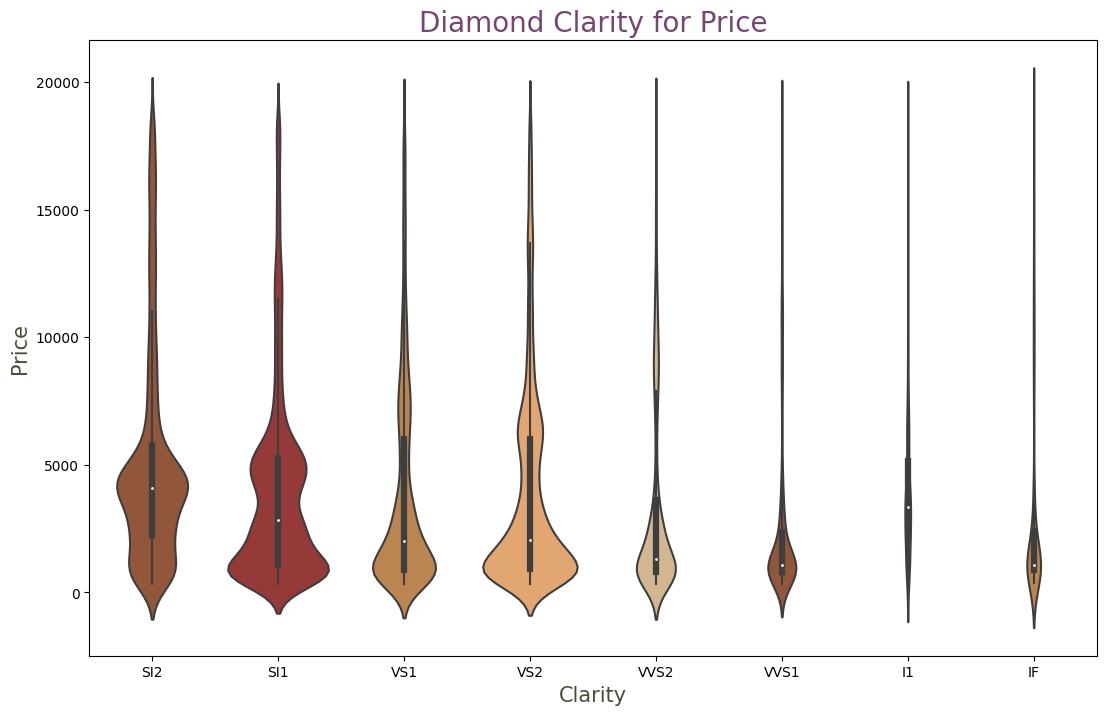

In [ ]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

In [ ]:
data.head(2)

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326.0
1,0.21,Premium,E,SI1,326.0


#**Label Encoder Converting Categorical Data into Numeric Form**

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
label = l1.fit_transform(data['cut'])
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [ ]:
label

array([2, 3, 1, ..., 4, 3, 2])

In [ ]:
data['cut_label'] = label

In [ ]:
data.head(3)

,carat,cut,color,clarity,price,cut_label
0,0.23,Ideal,E,SI2,326.0,2
1,0.21,Premium,E,SI1,326.0,3
2,0.23,Good,E,VS1,327.0,1


In [ ]:
l2 = LabelEncoder()
label1 = l2.fit_transform(data['clarity'])
data['clarity_label'] = label1
data.head(3)


,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,E,SI2,326.0,2,3
1,0.21,Premium,E,SI1,326.0,3,2
2,0.23,Good,E,VS1,327.0,1,4


In [ ]:
data['color']= data['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'NA':8})

In [ ]:
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

In [ ]:
data['color'].isnull().sum()

0

In [ ]:
data.head(2)

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2


In [ ]:
y=data['price']
y.head(1)

0    326.0
Name: price, dtype: float64

In [ ]:
x=data.drop(['price','cut','clarity'],axis = 1)
x.head(1)

,carat,color,cut_label,clarity_label
0,0.23,2,2,3


In [ ]:


# Drop rows with missing values
data = data.dropna()





In [ ]:
# Drop duplicates
data = data.drop_duplicates()

In [ ]:
# Save the cleaned dataset to a new CSV file
#data.to_csv('cleaned_diamonds.csv', index=False)

###TRAINING DATASET


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8, random_state=42)


In [ ]:
len(x_train)

43152

In [ ]:
len(y_test)

10788

###StandardScaler Method

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

#Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
pred=linreg.predict(x_test)

#Accuracy Score of Linear Regression Model

In [ ]:
from sklearn.metrics import r2_score
lr = r2_score(y_test,pred)*100
print('r^2 = ',lr,"%")

r^2 =  87.76517206528275 %


##**Prediction** **Part**

In [ ]:
import numpy as np  # You need to import numpy if it's not already imported
from sklearn.linear_model import LinearRegression

# Assuming you have already trained a Linear Regression model named 'linreg'

def prediction():
    carat = float(input("Enter the value of carat(0.2-5):"))
    cut = int(input("Enter the value of cut(1-4):"))
    clarity = int(input("Enter the value of clarity(1-8):"))
    color = int(input("Enter the value of color(1-8):"))

    price = linreg.predict([[carat, cut, clarity, color]])

    print("Approximately Price of Diamond is:", '$', round(price[0], 2))

prediction()





